### Simple Dense Neural network on CIFAR-10 Data

This code creates a simple Dense Neural network to train a model to classify CIFAR dataset on Dense neural network.

In [1]:
import pickle
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow.keras #FOR GPU KERNEL

from sklearn.model_selection import train_test_split
from keras.callbacks import LearningRateScheduler

def unpickle(file):
    with open(file, 'rb') as f:
        dict = pickle.load(f, encoding="latin1")
    return dict

datadict_tst = unpickle(r'/cifar-10/test_batch') #Loads all unpickled raw Test data in datadict_tst variable

def Load_Data(Data_sets):
    LBL=[]
    for i in range(1, Data_sets+1):

        path='/cifar-10/data_batch_{}'.format(i)
        Load = unpickle(r'{}'.format(path))
        DAT=Load["data"]           
        LBL+=Load["labels"]
        if i == 1:           
            Da=Load["data"]           
        else:
            Da=np.vstack([Da, DAT])           
#    print("Data Shape:",Da.shape)
    LBL = np.array(LBL)
#    print("Label Shape:",LBL.shape)
    return Da,LBL


X,Y=Load_Data(5) #Load All 5 data sets into X1 and Labels in Y

X = X.reshape(X.shape[0], 3072).astype("float32") #Reshape the 10K images into 3072. (Flattened)
X = (X - np.min(X)) / (np.max(X) - np.min(X))

Q1a = datadict_tst["data"]
Q_Label = datadict_tst["labels"] #Contains Test labels
Q_Label = np.array(Q_Label)  ## contains class numbers for each image to tell which img belongs to which class

Q_TST = Q1a.reshape(Q1a.shape[0], 3072).astype("float32") #Reshape the 10K images into 3072. (for RGBs)  
Q_TST = (Q_TST - np.min(Q_TST)) / (np.max(Q_TST) - np.min(Q_TST))

print('All Datasets Loaded')
print("Training Dataset's Dimensions:" ,X.shape) #print flattened Training DATA dimensions
print("Training Label's Dimensions:" ,Y.shape) #print flattened Training Label's dimensions
print()
print("Test Dataset's Dimensions:" ,Q_TST.shape) #print flattened TEST DATA dimensions
print("Test Label's Dimensions:" ,Q_Label.shape) #print flattened TEST DATA dimensions

#print("Normalizing training and test data")

#Split Test images to Validation and Test
X_Train, X_Val, Y_Train, Y_Val = train_test_split(X, Y, test_size=0.05, stratify=Y)  #random_state=0, 

print("Training Dataset's Dimensions:" ,X_Train.shape,"class Dim: ", Y_Train.shape)
print("Validation Dataset's Dimensions:" ,X_Val.shape,"class Dim: ", Y_Val.shape)




print('========================================================================')
#Y_Label_hot=tf.one_hot(Y, 10)
#Q_Label_hot=tf.one_hot(Q_Label, 10)


Y_Val = tf.one_hot(Y_Val, 10)
Y_Train = tf.one_hot(Y_Train, 10)

Q_Label = tf.one_hot(Q_Label, 10)

print("One-HOT Train Dataset's Dimensions:" ,Y_Train.shape)
print("One-HOT Validation Dataset's Dimensions:" ,Y_Val.shape)
print("One-HOT Test (Prediction) Dataset's Dimensions:" ,Q_Label.shape)


All Datasets Loaded
Training Dataset's Dimensions: (50000, 3072)
Training Label's Dimensions: (50000,)

Test Dataset's Dimensions: (10000, 3072)
Test Label's Dimensions: (10000,)
Training Dataset's Dimensions: (47500, 3072) class Dim:  (47500,)
Validation Dataset's Dimensions: (2500, 3072) class Dim:  (2500,)
One-HOT Train Dataset's Dimensions: (47500, 10)
One-HOT Validation Dataset's Dimensions: (2500, 10)
One-HOT Test (Prediction) Dataset's Dimensions: (10000, 10)


### Create a simple model

In [2]:
model = Sequential()# Model sequential

model.add(Dense(500, input_dim=3072, activation='sigmoid')) # 1st hidden layer  #try relu; 
model.add(Dense(500, activation='sigmoid')) # 2nd hidden layer
model.add(Dense(10, activation='softmax')) # Output layer

tensorflow.keras.optimizers.SGD(learning_rate=0.24) # Learning rate #FOR GPU KERNEL
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 500)               1536500   
_________________________________________________________________
dense_1 (Dense)              (None, 500)               250500    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                5010      
Total params: 1,792,010
Trainable params: 1,792,010
Non-trainable params: 0
_________________________________________________________________


### Train the model for 50 epochs and plot the graph

Training and Validating the Model with 150 epochs and the batch size of 192
Epoch 1/50
238/238 [==============================] - 2s 6ms/step - loss: 2.2965 - accuracy: 0.1316 - val_loss: 2.2833 - val_accuracy: 0.1340
Epoch 2/50
238/238 [==============================] - 1s 5ms/step - loss: 2.2734 - accuracy: 0.1799 - val_loss: 2.2615 - val_accuracy: 0.2140
Epoch 3/50
238/238 [==============================] - 1s 5ms/step - loss: 2.2526 - accuracy: 0.2070 - val_loss: 2.2417 - val_accuracy: 0.1776
Epoch 4/50
238/238 [==============================] - 1s 5ms/step - loss: 2.2301 - accuracy: 0.2251 - val_loss: 2.2147 - val_accuracy: 0.2548
Epoch 5/50
238/238 [==============================] - 1s 5ms/step - loss: 2.2053 - accuracy: 0.2465 - val_loss: 2.1880 - val_accuracy: 0.2460
Epoch 6/50
238/238 [==============================] - 1s 5ms/step - loss: 2.1784 - accuracy: 0.2485 - val_loss: 2.1593 - val_accuracy: 0.2784
Epoch 7/50
238/238 [==============================] - 1s 5ms/step - loss

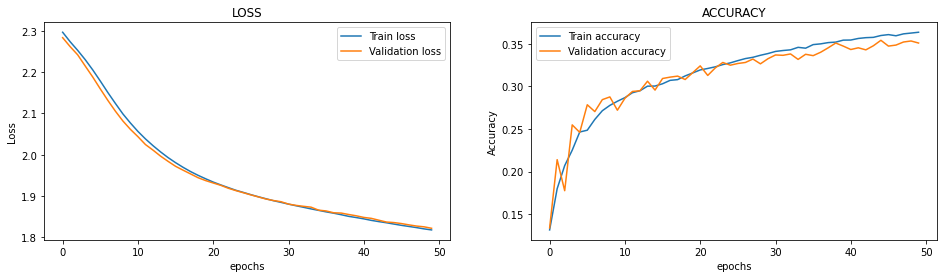

In [3]:
#TRAIN THE MODEL
tr_hist = model.fit(X_Train, Y_Train, batch_size=200, epochs=50, verbose=1,validation_data=(X_Val, Y_Val))

#Test Data Accuracy
acc = model.evaluate(Q_TST, Q_Label, verbose=1)   #Prediction or Test dataset
print(f'Accuracy of Test data is: {acc[1]*100} %')

#Plot graphs
plt.figure(figsize=(16,4))  
plt.subplot(1, 2, 1)

plt.plot(tr_hist.history['loss'],label="Train loss")
plt.plot(tr_hist.history['val_loss'],label="Validation loss", linestyle='-')
plt.title('LOSS')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(tr_hist.history['accuracy'],label="Train accuracy")
plt.plot(tr_hist.history['val_accuracy'],label="Validation accuracy", linestyle='-')
plt.title('ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.show()


#### Let's try to customize our model.

Add more layers with more nodes. Change activation to relu.

In [4]:
model2 = Sequential()# Model sequential

model2.add(Dense(1000, input_dim=3072, activation='relu')) # 1st hidden layer  #try relu; 
model2.add(Dense(500, activation='relu')) # 2nd hidden layer
model2.add(Dense(250, activation='relu')) # 2nd hidden layer
model2.add(Dense(10, activation='softmax')) # Output layer

loss_fn=tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,
    label_smoothing=0.0,
    axis=-1,
    reduction="auto",
    name="categorical_crossentropy")

#tf.keras.optimizers.Adam(learning_rate=0.5, beta_1=0.9, beta_2=0.999,epsilon=1e-07, amsgrad=False, name='Adam')  #Adam Optimiser
#model2.compile(loss=loss_fn, metrics=['accuracy'])

tensorflow.keras.optimizers.SGD(learning_rate=0.0001)
model2.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

#tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
#model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dense_4 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_5 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2510      
Total params: 3,701,260
Trainable params: 3,701,260
Non-trainable params: 0
_________________________________________________________________


#### Let's use a Learning rate Scheduler

In [5]:
def step_decay_schedule(initial_lr=1e-3, decay_factor=0.75, step_size=3):
    def schedule(epoch):
        return initial_lr * (decay_factor ** np.floor(epoch/step_size))
    return schedule



Epoch 1/30

Epoch 00001: LearningRateScheduler setting learning rate to 0.01.
238/238 [==============================] - 2s 8ms/step - loss: 1.9932 - accuracy: 0.2943 - val_loss: 1.8844 - val_accuracy: 0.3132
Epoch 2/30

Epoch 00002: LearningRateScheduler setting learning rate to 0.01.
238/238 [==============================] - 2s 7ms/step - loss: 1.8163 - accuracy: 0.3594 - val_loss: 1.7951 - val_accuracy: 0.3448
Epoch 3/30

Epoch 00003: LearningRateScheduler setting learning rate to 0.01.
238/238 [==============================] - 2s 7ms/step - loss: 1.7479 - accuracy: 0.3886 - val_loss: 1.7603 - val_accuracy: 0.3616
Epoch 4/30

Epoch 00004: LearningRateScheduler setting learning rate to 0.0075.
238/238 [==============================] - 2s 7ms/step - loss: 1.6918 - accuracy: 0.4095 - val_loss: 1.7107 - val_accuracy: 0.3840
Epoch 5/30

Epoch 00005: LearningRateScheduler setting learning rate to 0.0075.
238/238 [==============================] - 2s 7ms/step - loss: 1.6628 - accuracy: 

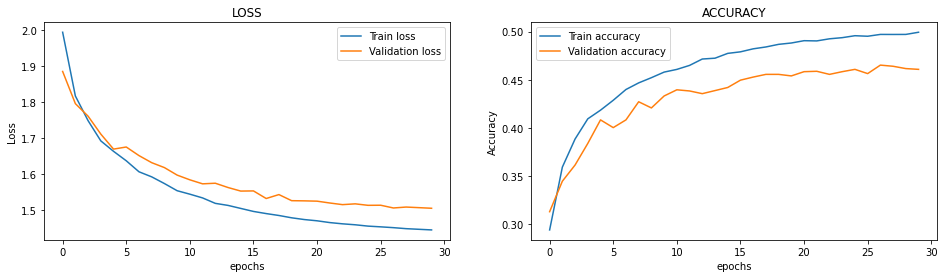

In [6]:
lr_sched = step_decay_schedule(initial_lr=0.01, decay_factor=0.75, step_size=3)  #define parameters for learning rate scheduler

callbacks = [LearningRateScheduler(lr_sched, verbose=1)]  #Create a callback

#TRAIN THE MODEL
tr_hist = model2.fit(X_Train, Y_Train, batch_size=200, epochs=30, verbose=1, callbacks=callbacks, validation_data=(X_Val, Y_Val))

#Test Data Accuracy
acc = model2.evaluate(Q_TST, Q_Label, verbose=1)   #Prediction or Test dataset
print(f'Accuracy of Test data is: {acc[1]*100} %')

#Plot graphs
plt.figure(figsize=(16,4))  
plt.subplot(1, 2, 1)

plt.plot(tr_hist.history['loss'],label="Train loss")
plt.plot(tr_hist.history['val_loss'],label="Validation loss", linestyle='-')
plt.title('LOSS')
plt.ylabel('Loss')
plt.xlabel('epochs')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.plot(tr_hist.history['accuracy'],label="Train accuracy")
plt.plot(tr_hist.history['val_accuracy'],label="Validation accuracy", linestyle='-')
plt.title('ACCURACY')
plt.ylabel('Accuracy')
plt.xlabel('epochs')
plt.legend(loc='upper left')
plt.show()




#### This is how you save a model

In [7]:
model2.save("model2")

INFO:tensorflow:Assets written to: model2\assets


#### This is how you load a model

In [8]:
model3 = tensorflow.keras.models.load_model("model2")
model3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 1000)              3073000   
_________________________________________________________________
dense_4 (Dense)              (None, 500)               500500    
_________________________________________________________________
dense_5 (Dense)              (None, 250)               125250    
_________________________________________________________________
dense_6 (Dense)              (None, 10)                2510      
Total params: 3,701,260
Trainable params: 3,701,260
Non-trainable params: 0
_________________________________________________________________
